<a href="https://colab.research.google.com/github/Ankitkumar1015/Gender-recognition/blob/main/gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [4]:
train_data_dir = '/content/drive/MyDrive/Ml/gender. google - Copy/train'
test_data_dir = '/content/drive/MyDrive/Ml/gender. google - Copy/test'


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 900 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,  # Ensure this is correctly set
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9994 - loss: 0.0047 - val_accuracy: 0.8906 - val_loss: 0.3725
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 0.8333 - val_loss: 0.7260
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8984 - val_loss: 0.3381
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9167 - val_loss: 0.9723
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8828 - val_loss: 0.4530
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9167 - val_loss: 0.8262
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9987 - loss: 0.0028 - val_accuracy: 0.9062 - val_loss: 0.3339
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 3.5137e-04 - val_accuracy: 0.8333 - val_l

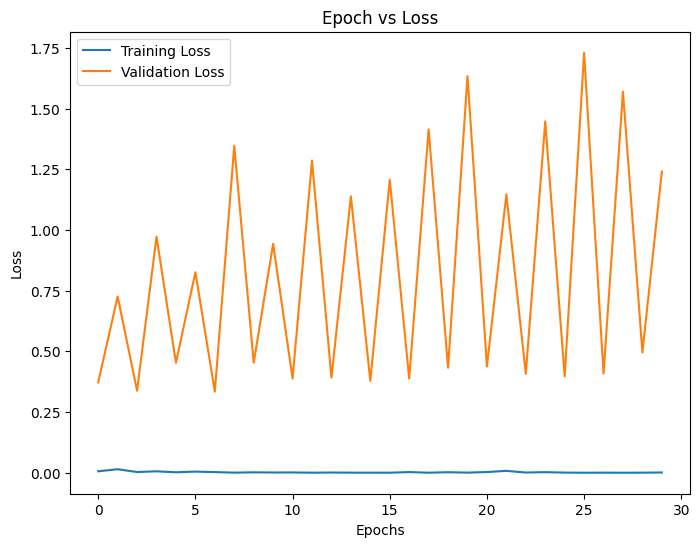

In [17]:
# Plot Epoch vs Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')

# Check if 'val_loss' exists in history before plotting
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Epoch vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc

In [21]:
cm = confusion_matrix(true_classes, predicted_classes)


In [23]:
import seaborn as sns

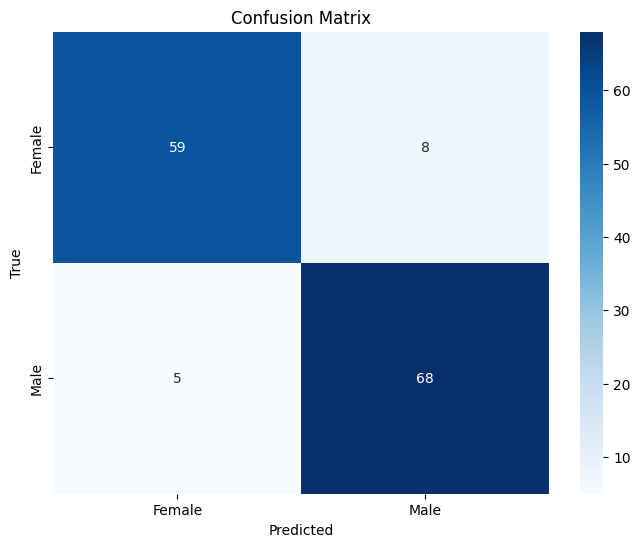

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


              precision    recall  f1-score   support

      Female       0.92      0.88      0.90        67
        Male       0.89      0.93      0.91        73

    accuracy                           0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



In [26]:
# Compute and print precision
precision = precision_score(true_classes, predicted_classes, average='binary')
print(f'Precision: {precision:.2f}')

Precision: 0.89


In [27]:
# Compute and print recall
recall = recall_score(true_classes, predicted_classes, average='binary')
print(f'Recall: {recall:.2f}')

Recall: 0.93


In [28]:
# Compute accuracy percentage
accuracy = np.mean(predicted_classes == true_classes) * 100
print(f'Accuracy: {accuracy:.2f}%')


Accuracy: 90.71%


In [29]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)


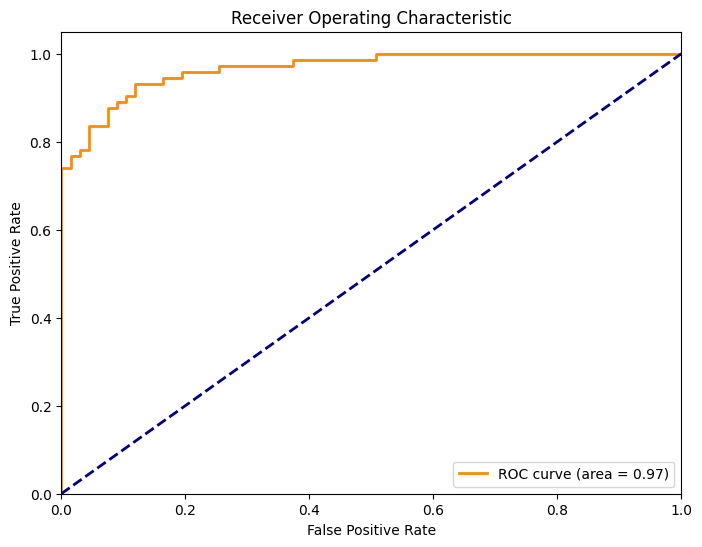

In [30]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [44]:
img_path = '/content/drive/MyDrive/Ml/gender. google - Copy/test/Male/177074_jpg.rf.8216afd8e8319b99f8d717388abec9db.jpg'


In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [46]:
img = load_img(img_path, target_size=(150, 150))  # Resize image to match input size
img_array = img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model's input
img_array = img_array / 255.0  # Normalize the image


In [47]:
prediction = model.predict(img_array)
predicted_class = 'Female' if prediction < 0.5 else 'Male'

print(f"The predicted gender is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The predicted gender is: Male
